In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')

In [3]:
thietbi.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [9]:
nguoidung_sudung.head(3)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789


In [10]:
nguoidung_thietbi.head(3)

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1


In [15]:
thietbi.rename(columns={'Retail Branding': 'Branding', 'Marketing Name': 'MarketingName'}, inplace=True)
thietbi.head(10)

,Branding,MarketingName,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


In [25]:
# Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng
# kết quả có các cột sau: [outgoing_mins_per_month, outgoing_sms_per_month,
# monthly_mb, use_id, platform, device]
dfTemp = pd.merge(left=nguoidung_sudung, right=nguoidung_thietbi[['use_id','platform', 'device']], on='use_id')
dfTemp.head(10)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
5,71.59,79.26,1557.33,22793,android,SM-G361F
6,71.59,79.26,519.12,22794,android,SM-G361F
7,71.59,79.26,519.12,22795,android,SM-G361F
8,30.92,22.77,3114.67,22799,android,ONEPLUS A3003
9,69.80,14.70,25955.55,22801,android,GT-I9505


In [26]:
# Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong
# bảng kết quả cuối cùng. Lưu ý ở đây khóa liên kết sẽ khác tên
# Hoặc left-join
# 6. Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT
dfTemp = pd.merge(dfTemp, thietbi[['Model', 'Branding']], left_on='device', right_on='Model')
dfTemp.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Model,Branding
0,21.97,4.82,1557.33,22787,android,GT-I9505,GT-I9505,Samsung
1,69.80,14.70,25955.55,22801,android,GT-I9505,GT-I9505,Samsung
2,249.26,253.22,1557.33,22875,android,GT-I9505,GT-I9505,Samsung
3,249.26,253.22,1557.33,22876,android,GT-I9505,GT-I9505,Samsung
4,83.46,114.06,3114.67,22880,android,GT-I9505,GT-I9505,Samsung


In [47]:
# Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng
# sử dụng của các nhãn hàng
meanData = dfTemp.groupby('Branding').aggregate({'outgoing_mins_per_month': 'mean', 'outgoing_sms_per_month': 'mean', 'monthly_mb': 'mean', 'use_id': 'count'})
meanData

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


In [ ]:
# Trực quan số lượng người dùng các nhãn hàng
import seaborn as sns

sns.countplot(y='Branding', data=dfTemp)
plt.plot()

[]

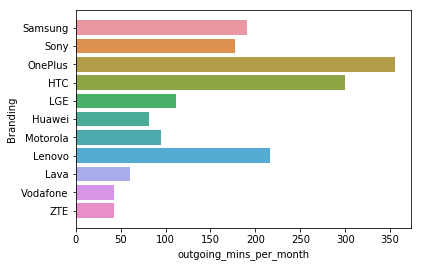

In [37]:
# Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên
# từng nhóm nhãn hàng bán lẻ
sns.barplot(data=dfTemp, x='outgoing_mins_per_month', y='Branding', ci=None)
plt.plot()

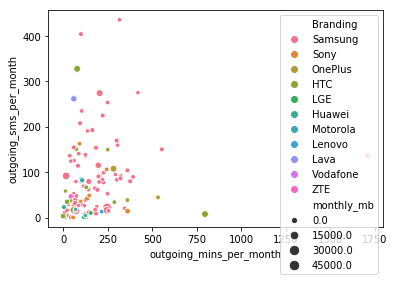

In [40]:
# Khảo sát tương quan giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng
sns.scatterplot(data=dfTemp, x='outgoing_mins_per_month', y='outgoing_sms_per_month', hue='Branding', size='monthly_mb', ci=None)

In [51]:
# Hãy kiểm định xem trung bình outgoing_mins_per_month có bằng 200 phút
import scipy.stats as stats

s, p = stats.ttest_1samp(dfTemp.outgoing_mins_per_month, popmean=200)
print(p)

if p < 0.05:
    print(f'Bac bo gia thiet {p}')
else:
    print(f'Chap nhan gia thiet {p}')

0.7133871524810332
Chap nhan gia thiet 0.7133871524810332


In [53]:
# Hãy kiểm định xem trung bình outgoing_sms_per_month có bằng 100 tin nhắn
s, p = stats.ttest_1samp(dfTemp.outgoing_sms_per_month, popmean=100)

if p < 0.05:
    print(f'Bac bo gia thuyet {p}')
else:
    print(f'Chap nhan gia thuyet {p}')

Bac bo gia thuyet 0.0034834938502051878


In [59]:
# Hãy kiểm định xem trung bình monthly_mb có bằng 2048 mb
s, p = stats.ttest_1samp(dfTemp.monthly_mb, popmean=2048)

if p < 0.05:
    print(f'Bac bo gia thuyet {p}')
else:
    print(f'Chap nhan gia thuyet {p}')

print(dfTemp.monthly_mb.mean())

Bac bo gia thuyet 1.3950238813156428e-08
4280.651343283576


In [65]:
# Hãy tạo ma trận tương quan giữa [outgoing_mins_per_month, outgoing_sms_per_month,
# monthly_mb] và sắp xếp tăng dần về mức độ tương quan

dfTemp[['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']].corr().unstack().sort_values(ascending=True)

outgoing_sms_per_month   monthly_mb                -0.046049
monthly_mb               outgoing_sms_per_month    -0.046049
outgoing_mins_per_month  outgoing_sms_per_month    -0.016494
outgoing_sms_per_month   outgoing_mins_per_month   -0.016494
outgoing_mins_per_month  monthly_mb                 0.213489
monthly_mb               outgoing_mins_per_month    0.213489
outgoing_mins_per_month  outgoing_mins_per_month    1.000000
outgoing_sms_per_month   outgoing_sms_per_month     1.000000
monthly_mb               monthly_mb                 1.000000
dtype: float64

In [76]:
# Kiểm định xem outgoing_mins_per_month, outgoing_sms_per_month có tương quan
r, p = stats.pearsonr(dfTemp['outgoing_mins_per_month'], dfTemp['outgoing_sms_per_month'])

print(f"Hệ số tương quan Pearson: {r}")
print(f"P-value: {p}")

# Kiểm định ý nghĩa thống kê
if p < 0.05:
    print("Có mối tương quan có ý nghĩa thống kê.")
else:
    print("Không có đủ bằng chứng để kết luận có mối tương quan.")

Hệ số tương quan Pearson: -0.01649444168531942
P-value: 0.8162223636414565
Không có đủ bằng chứng để kết luận có mối tương quan.


In [73]:
# Hãy kiểm định xem có mối quan hệ nào giữa platform và branding
table = pd.crosstab(dfTemp['platform'], dfTemp['Branding'])
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies table:")
print(expected)

# Đánh giá kết quả
if p < 0.05:
    print("Có mối quan hệ giữa platform và Branding (bác bỏ giả thuyết H0).")
else:
    print("Không có bằng chứng đủ mạnh để khẳng định có mối quan hệ giữa platform và Branding (chấp nhận H0).")



Chi-square statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected frequencies table:
[[ 44.   3.   2.   2.   2.  16.   6. 108.  16.   1.   1.]]
Không có bằng chứng đủ mạnh để khẳng định có mối quan hệ giữa platform và Branding (chấp nhận H0).


In [98]:
# 17.  Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform
platforms = dfTemp['platform'].unique()

grouped_data = [dfTemp[dfTemp['platform'] == platform]['monthly_mb'] for platform in platforms if len(dfTemp[dfTemp['platform'] == platform]) > 1]

if len(grouped_data) >= 2: 
    f_stat, p_value = stats.f_oneway(*grouped_data)
    print(f"Giá trị F: {f_stat}")
    print(f"P-value: {p_value}")

    # Kiểm định giả thuyết
    alpha = 0.05
    if p_value < alpha:
        print("Có mối quan hệ giữa monthly_mb và platform.")
    else:
        print("Không có mối quan hệ giữa monthly_mb và platform.")
else:
    print("Không có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA.")

Không có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA.


In [102]:
df = dfTemp

# Lấy tất cả giá trị unique trong cột 'Branding'
branding_types = df['Branding'].unique()

# Lặp qua từng loại Branding
for branding in branding_types:
    print(f"\nKiểm định ANOVA cho Branding: {branding}")
    
    # Lọc dữ liệu cho từng loại Branding
    df_branding = df[df['Branding'] == branding]
    
    # Lấy các platform khác nhau trong từng nhóm Branding
    platforms = df_branding['platform'].unique()
    
    # Lọc dữ liệu cho mỗi platform trong nhóm Branding
    grouped_data = [df_branding[df_branding['platform'] == platform]['monthly_mb'] for platform in platforms if len(df_branding[df_branding['platform'] == platform]) > 1]
    
    # Kiểm tra có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA
    if len(grouped_data) >= 2:
        # Thực hiện kiểm định ANOVA
        f_stat, p_value = f_oneway(*grouped_data)
        
        # In kết quả
        print(f"Giá trị F: {f_stat}")
        print(f"P-value: {p_value}")
        
        # Kiểm định giả thuyết
        alpha = 0.05
        if p_value < alpha:
            print(f"Có mối quan hệ giữa monthly_mb và platform trong nhóm {branding}.")
        else:
            print(f"Không có mối quan hệ giữa monthly_mb và platform trong nhóm {branding}.")
    else:
        print(f"Không có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA trong nhóm {branding}.")


Kiểm định ANOVA cho Branding: Samsung
Không có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA trong nhóm Samsung.

Kiểm định ANOVA cho Branding: Sony
Không có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA trong nhóm Sony.

Kiểm định ANOVA cho Branding: OnePlus
Không có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA trong nhóm OnePlus.

Kiểm định ANOVA cho Branding: HTC
Không có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA trong nhóm HTC.

Kiểm định ANOVA cho Branding: LGE
Không có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA trong nhóm LGE.

Kiểm định ANOVA cho Branding: Huawei
Không có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA trong nhóm Huawei.

Kiểm định ANOVA cho Branding: Motorola
Không có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA trong nhóm Motorola.

Kiểm định ANOVA cho Branding: Lenovo
Không có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA trong nhóm Lenovo.

Kiểm định ANOVA cho Branding: Lava
Không có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA trong nhóm Lava.

Kiểm định AN

In [105]:
# Phân tích sự ảnh hưởng của outgoing_mins_per_month, outgoing_sms_per_month đến
# monthly_mb dựa trên mô hình hồi quy tuyến tính
import pandas as pd
import statsmodels.api as sm

X = df[['outgoing_mins_per_month', 'outgoing_sms_per_month']]
y = df['monthly_mb']

# Thêm một cột hằng số (intercept) vào X để có thể tính toán được hệ số intercept
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# In kết quả tóm tắt của mô hình hồi quy
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             monthly_mb   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.925
Date:                Fri, 28 Feb 2025   Prob (F-statistic):            0.00818
Time:                        22:11:01   Log-Likelihood:                -2005.3
No. Observations:                 201   AIC:                             4017.
Df Residuals:                     198   BIC:                             4027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

In [108]:
def predict_monthly_mb(outgoing_mins_per_month, outgoing_sms_per_month):
    intercept = 3513.0441
    coef_mins = 4.8782
    coef_sms = -2.8500
    return intercept + coef_mins * outgoing_mins_per_month + coef_sms * outgoing_sms_per_month

def main():
    try:
        outgoing_mins = float(input("Nhập số phút gọi (outgoing_mins_per_month): "))
        outgoing_sms = float(input("Nhập số tin nhắn (outgoing_sms_per_month): "))
        
        predicted_mb = predict_monthly_mb(outgoing_mins, outgoing_sms)
        
        print(f"Dung lượng internet tiêu thụ dự báo: {predicted_mb:.2f} MB")
    
    except ValueError:
        print("Vui lòng nhập giá trị hợp lệ cho số phút gọi và số tin nhắn.")

if __name__ == "__main__":
    main()


Dung lượng internet tiêu thụ dự báo: 3543.20 MB


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['outgoing_mins_per_month', 'outgoing_sms_per_month']]
y = df['monthly_mb']

model = LinearRegression()
model.fit(X, y)

def predict_monthly_mb(outgoing_mins_per_month, outgoing_sms_per_month):
    prediction = model.predict([[outgoing_mins_per_month, outgoing_sms_per_month]])
    return prediction[0]

print("Chương trình dự báo dung lượng internet tiêu thụ theo số phút gọi và số tin nhắn.")

outgoing_mins = float(input("Nhập số phút gọi trong tháng (outgoing_mins_per_month): "))
outgoing_sms = float(input("Nhập số tin nhắn gửi trong tháng (outgoing_sms_per_month): "))

predicted_mb = predict_monthly_mb(outgoing_mins, outgoing_sms)

print(f"Dự báo dung lượng internet tiêu thụ trong tháng: {predicted_mb:.2f} MB")

Chương trình dự báo dung lượng internet tiêu thụ theo số phút gọi và số tin nhắn.
Dự báo dung lượng internet tiêu thụ trong tháng: 3543.20 MB
